#### Data Loading

In [2]:
# Importing the dataset
import pandas as pd
df = pd.read_csv("Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
# Columns of the dataframe
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

#### Task 1 : Restaurant Ratings

Analyzing the distribution of aggregate ratings and determining the most common rating range :

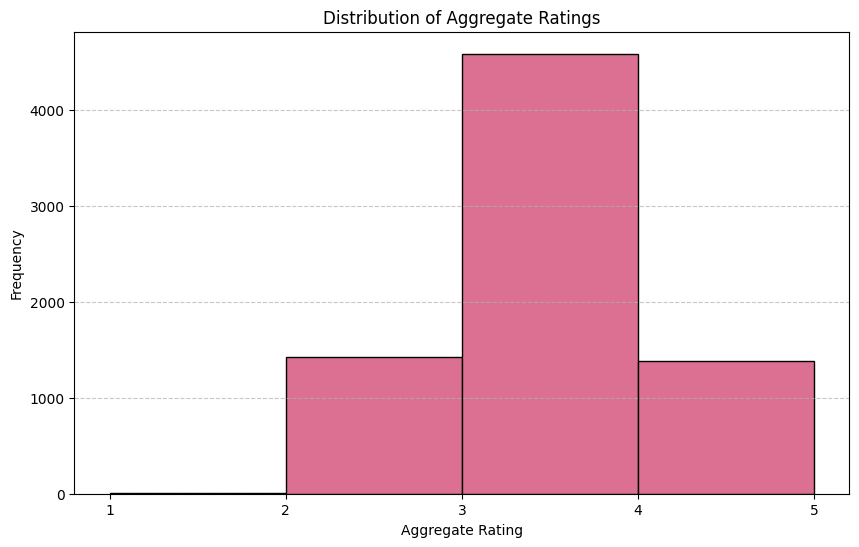

In [4]:
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=range(1, 6), color='palevioletred', edgecolor='black')
plt.title('Distribution of Aggregate Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))  # Set x-ticks to match the rating scale
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Interpretation : Most of the restaurants have an aggregate rating between 3 and 4

Calculating the average number of votes received by restaurant : 

In [5]:
# Calculate the average number of votes received by restaurants
average_votes = df['Votes'].mean()

# Display the result
print("Average number of votes received by restaurants:", average_votes)

Average number of votes received by restaurants: 156.909747670401


Interpretation : The average number of votes received by restaurants is approximately 157, indicating a moderate level of engagement and feedback from customers. 

#### Task 2 : Cuisine Combination

Identifying the most common combinations of cuisines in the dataset : 

In [6]:
df['Cuisine_list'] = df['Cuisines'].str.split(', ')

combination_counts = {}

for cuisines in df['Cuisine_list']:
    if isinstance(cuisines, list):
        # Join the sorted cuisine list into a string to represent the combination
        combination = ', '.join(sorted(cuisines))
        # Add the combination to the dictionary and update its count
        combination_counts[combination] = combination_counts.get(combination, 0) + 1

print("Unique cuisine combinations and their counts:")
for combination, count in combination_counts.items():
    if len(combination.split(', ')) > 1 and count > 100:
        print(combination, "-", count)


Unique cuisine combinations and their counts:
Fast Food, Pizza - 142
Mughlai, North Indian - 394
Chinese, Mughlai, North Indian - 306
Chinese, Continental, North Indian - 107
Fast Food, North Indian - 120
Desserts, Ice Cream - 109
Chinese, North Indian - 616
Chinese, North Indian, South Indian - 135
Chinese, Fast Food, North Indian - 102
Bakery, Desserts - 181
Chinese, Fast Food - 159
Bakery, Fast Food - 117
Mithai, Street Food - 134


Interpretation : From the above table we can understand that the most common combination of cuisines with repeatitions > 100 also The most common combination being Mughlai, North Indian - 394.

#### Task 3 : Geographic Analysis


Plotting the locations of restaurants on a map using longitude and latitude coordinates :

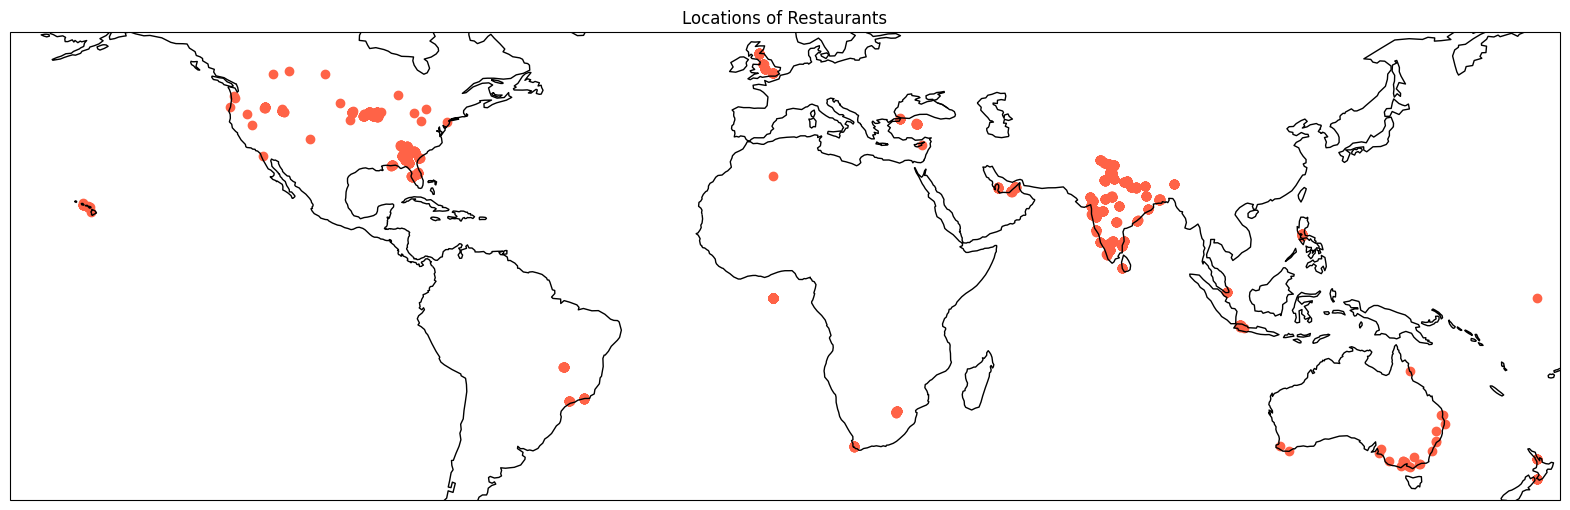

In [ ]:
import cartopy.crs as ccrs

plt.figure(figsize=(20,15))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Plot the locations of restaurants on the world map
ax.scatter(df['Longitude'], df['Latitude'], color='tomato', marker='o', transform=ccrs.PlateCarree())

plt.title('Locations of Restaurants')
plt.show()

Identifying any patterns or clusters of restaurants in specific areas :

* West Coast of Australia (New South Wales and Victoria): There is a cluster of restaurants located along the west coast of Australia, particularly in the regions of New South Wales and Victoria.
* East Coast and South Region of India: A cluster of restaurants is observed along the east coast and in the southern region of India.
* Bahamas Region in USA: There exists a cluster of restaurants in the Bahamas region of the USA.

#### Task 4 : Restaurant Chains

Identifying if there are any restaurant chains present in the dataset :

In [ ]:
# Clean the restaurant names by converting them to lowercase and removing leading/trailing spaces
df['Restaurant Name'] = df['Restaurant Name'].str.lower().str.strip()

# Group the DataFrame by restaurant names and count the occurrences
restaurant_counts = df['Restaurant Name'].value_counts()

# Filter restaurants that appear more than once (potential chains)
chains = restaurant_counts[restaurant_counts > 1]

# Display the identified restaurant chains
print("Restaurant chains present in the dataset:")
print(chains)

Restaurant chains present in the dataset:
Restaurant Name
cafe coffee day        83
domino's pizza         79
subway                 63
green chick chop       51
mcdonald's             48
                       ..
jack po!tato's          2
metro fast food         2
the mirch masala        2
punjabi chicken         2
south indian corner     2
Name: count, Length: 742, dtype: int64


Interpretation : So we can conclude that restaurant chains are present in the dataset.

Analyzing the ratings and popularity of different restaurant chains :

In [8]:
ccd_ratings = df[df['Restaurant Name'] == 'Cafe Coffee Day']['Aggregate rating']
mean_rating_ccd = ccd_ratings.mean()

dom_rating = df[df['Restaurant Name'] == "Domino's Pizza"]['Aggregate rating']
mean_dom_rating = dom_rating.mean()

subway_rating = df[df['Restaurant Name'] == 'Subway']['Aggregate rating']
mean_sub_rating = subway_rating.mean()

print("Average rating of Cafe Coffee Day is: " + str(mean_rating_ccd))
print("Average rating of Domino's Pizza is: " + str(mean_dom_rating))
print("Average rating of Subway is: " + str(mean_sub_rating))

Average rating of Cafe Coffee Day is: 2.4192771084337346
Average rating of Domino's Pizza is: 2.740506329113924
Average rating of Subway is: 2.9079365079365083


In [9]:
ccd_ratings = df[df['Restaurant Name'] == 'Cafe Coffee Day']['Votes']
mean_rating_ccd = ccd_ratings.mean()

dom_rating = df[df['Restaurant Name'] == "Domino's Pizza"]['Votes']
mean_dom_rating = dom_rating.mean()

subway_rating = df[df['Restaurant Name'] == 'Subway']['Votes']
mean_sub_rating = subway_rating.mean()

print("Average rating of Cafe Coffee Day is: " + str(mean_rating_ccd))
print("Average rating of Domino's Pizza is: " + str(mean_dom_rating))
print("Average rating of Subway is: " + str(mean_sub_rating))

Average rating of Cafe Coffee Day is: 29.253012048192772
Average rating of Domino's Pizza is: 84.0886075949367
Average rating of Subway is: 97.2063492063492


Interpretation : From the above analysis we can understand that Subway has more ratings and popularity.